# Import Libraries

In [1]:
#Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.feature_selection import GenericUnivariateSelect, chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline                     

# Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_csv('heart_statlog.csv')

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [8]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [10]:
corr = df.corr()
corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


# EDA (Visualization)

<Axes: >

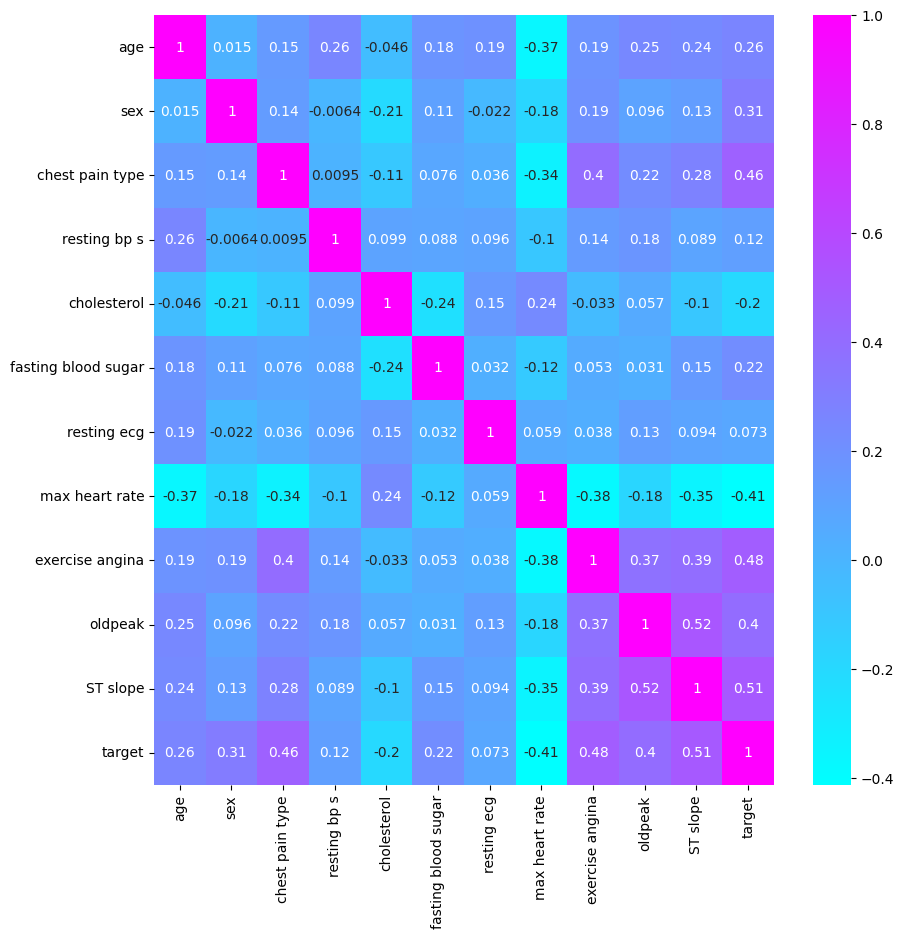

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap ='cool',annot = True)

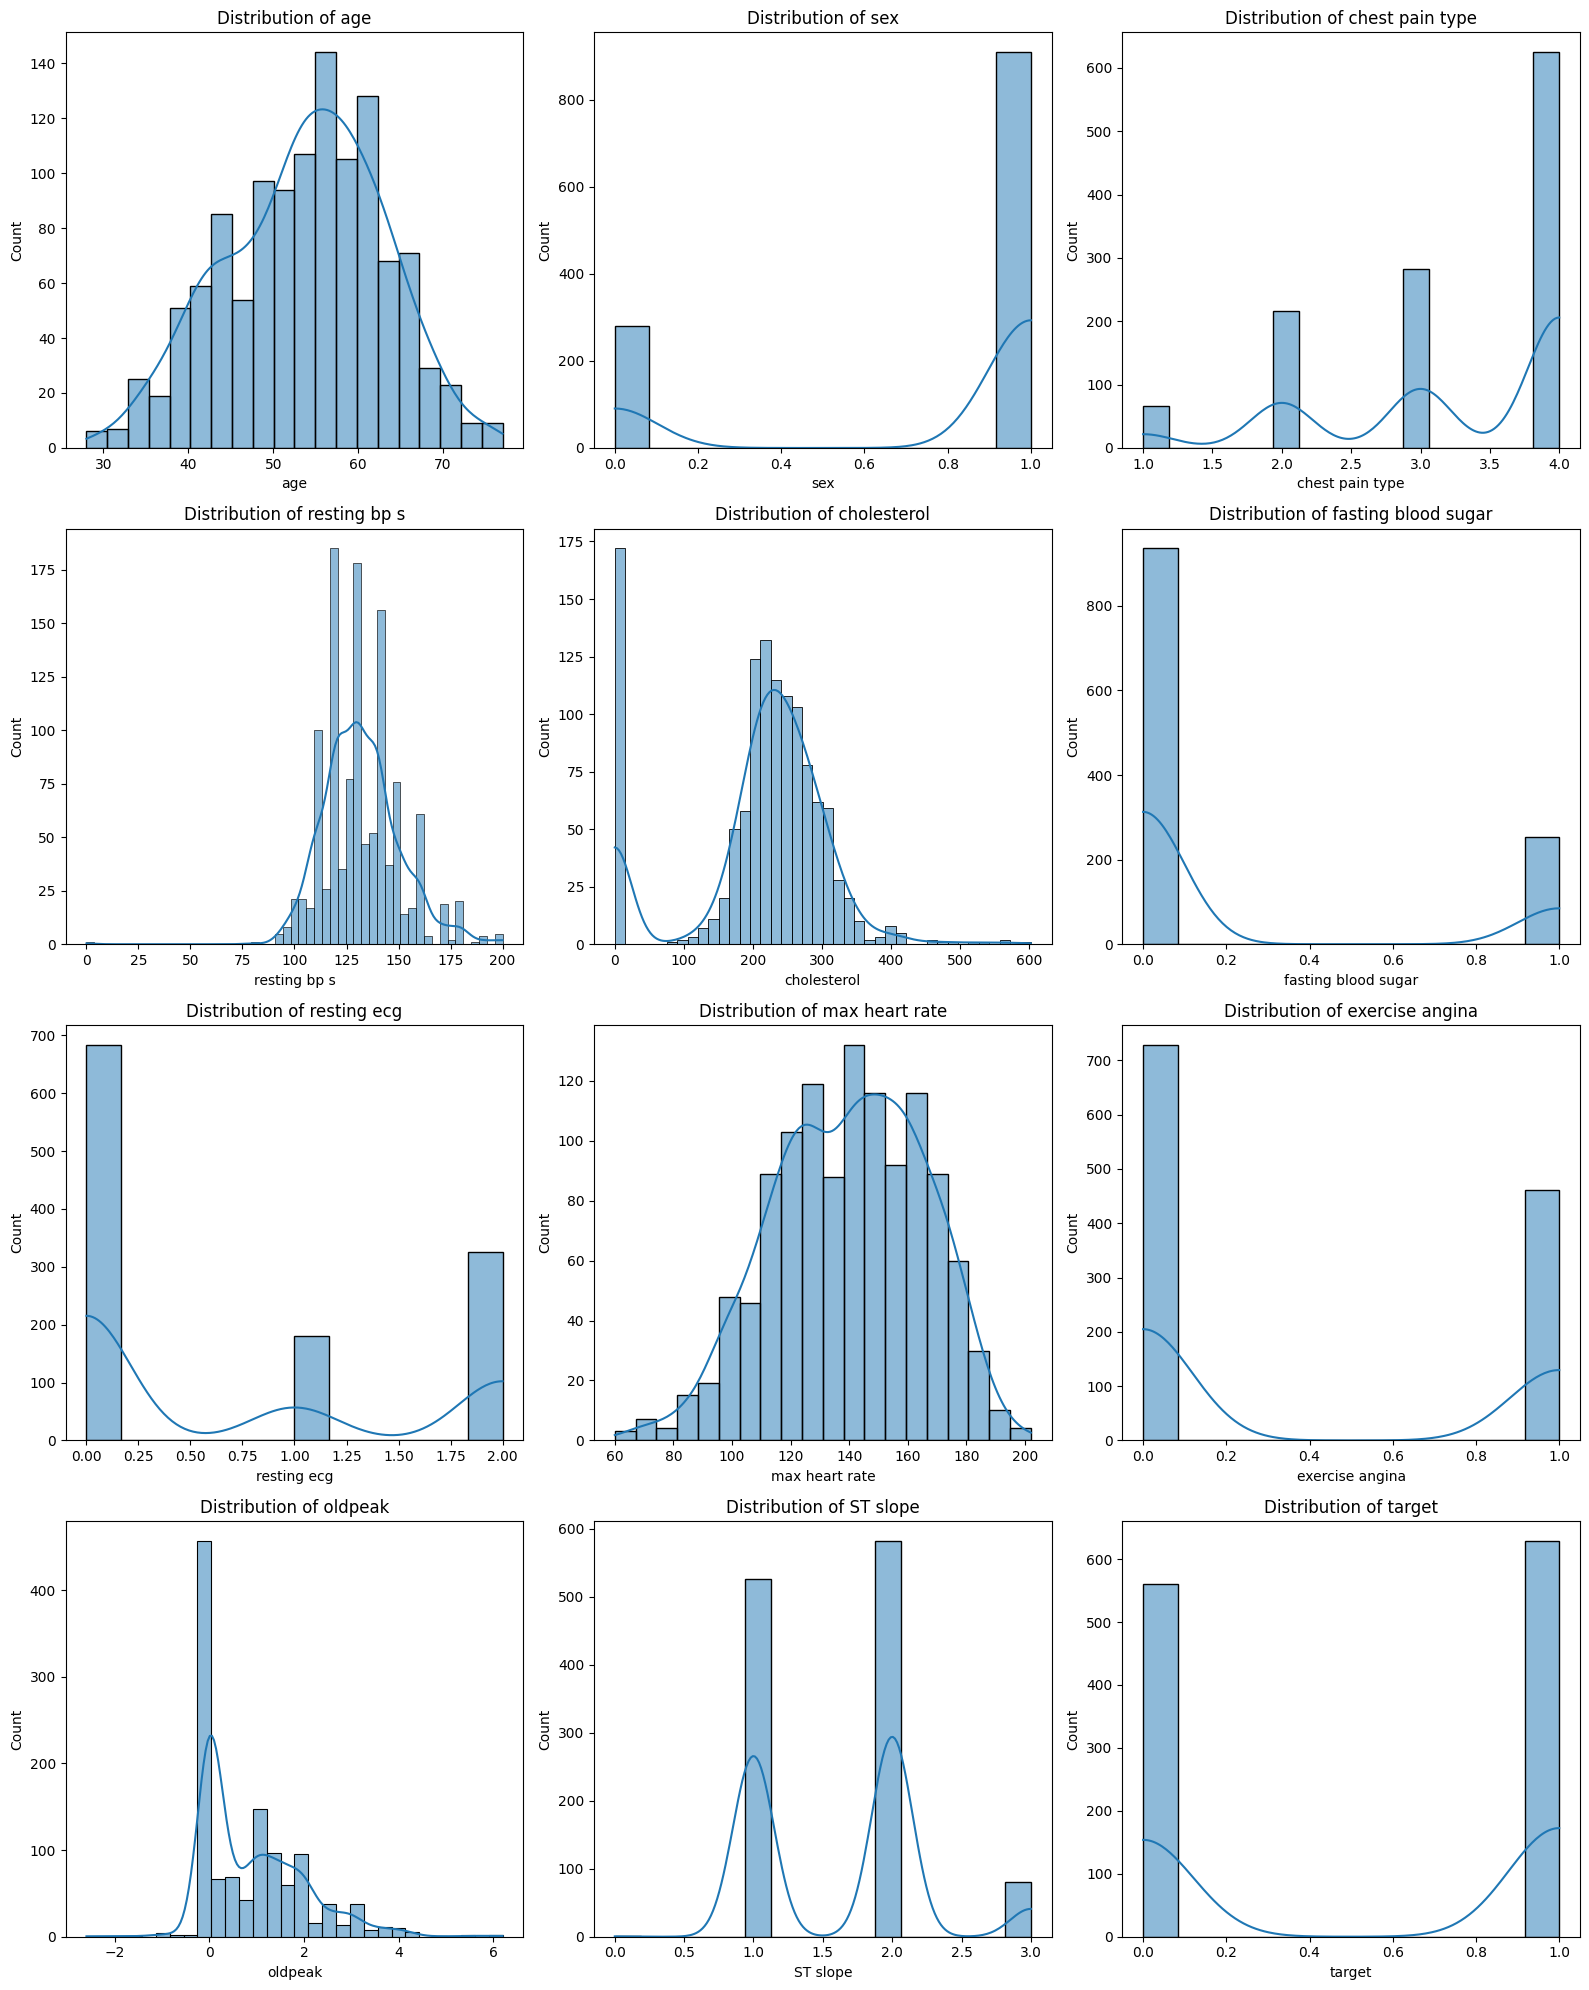

In [12]:
# Distribution Plots for Numerical Columns
def plot_distributions(df, cols, n_cols=3):
    n_rows = (len(cols) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f"Distribution of {col}")
    
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")
        
    plt.tight_layout()
    plt.show()

plot_distributions(df, df.columns)

In [13]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

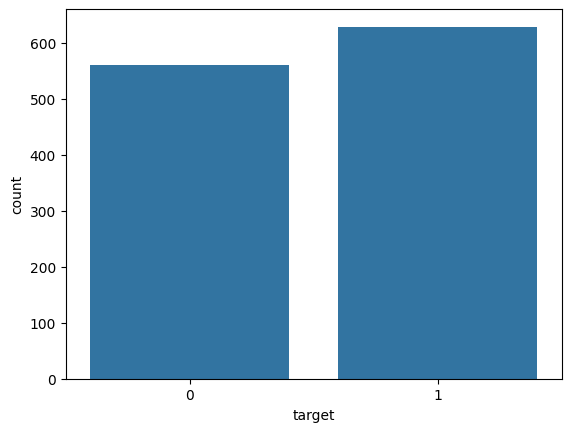

In [14]:
sns.countplot(x='target',data = df)

In [15]:
X = df.drop("target",axis=1)
y = df['target']

In [16]:
Features = X.columns

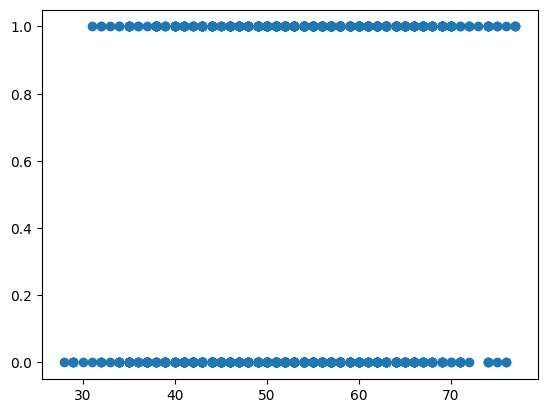

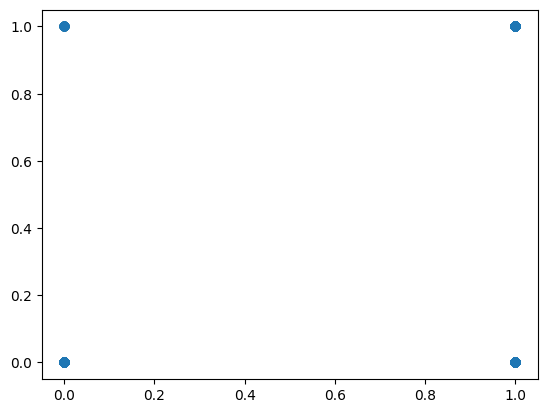

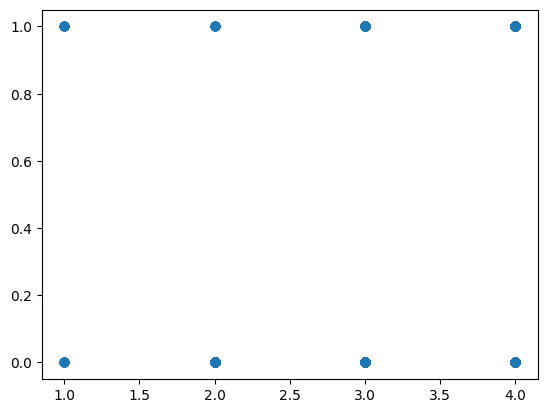

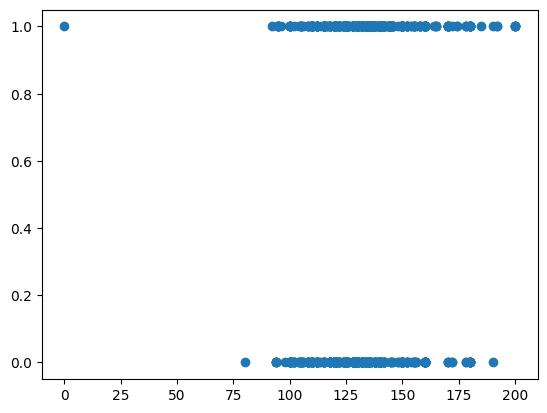

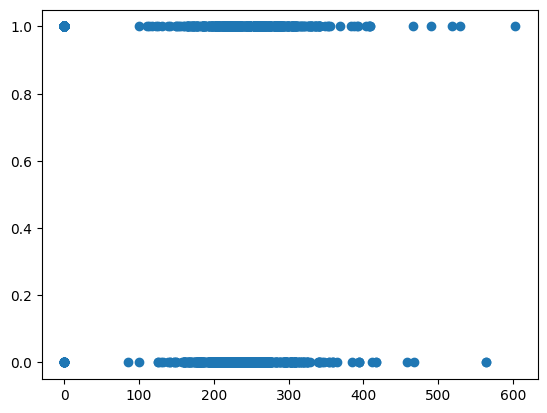

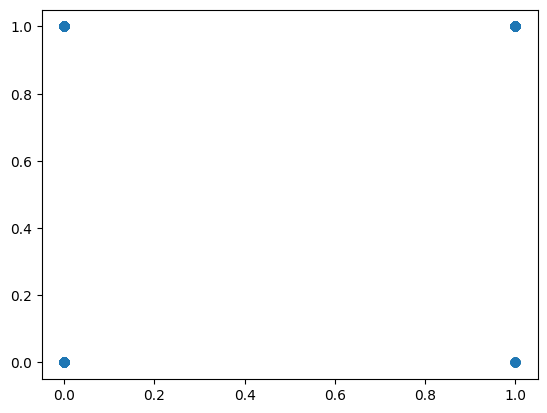

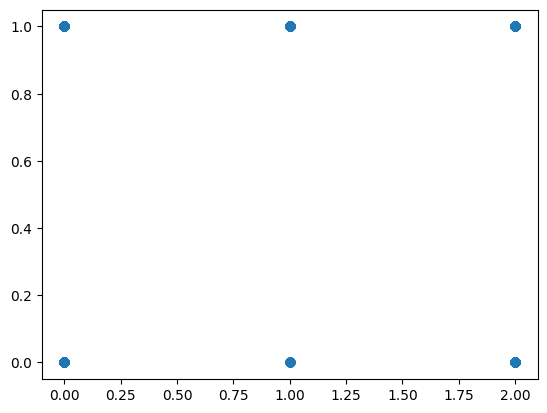

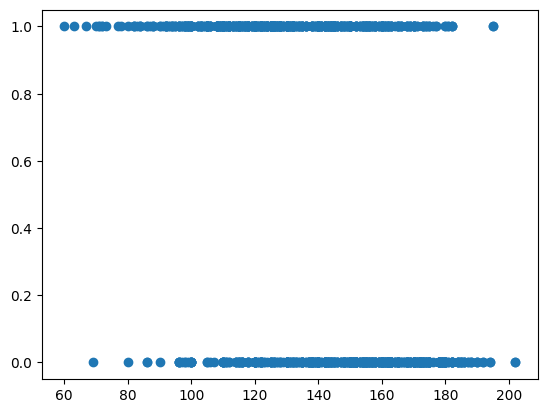

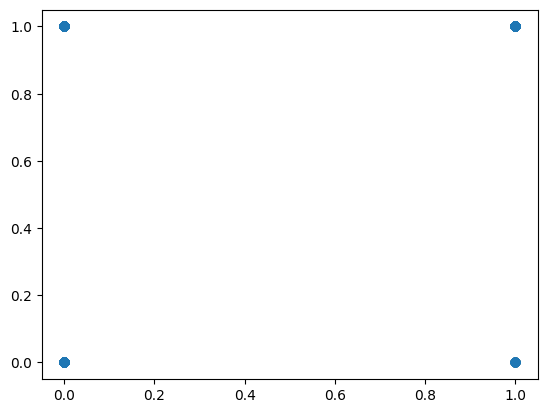

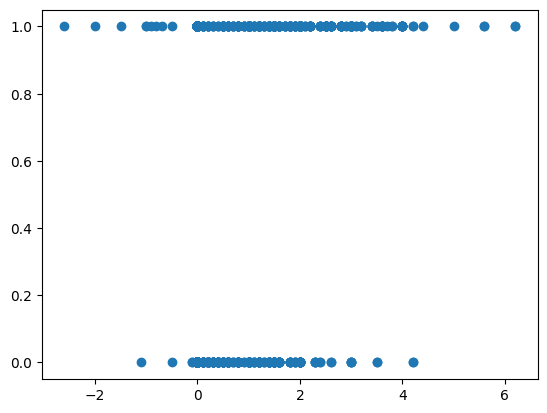

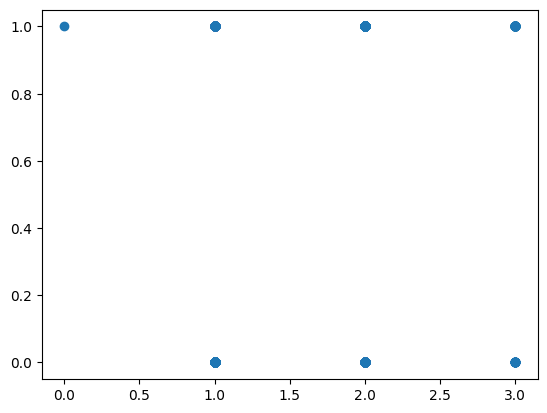

In [17]:
for feature in Features:
    plt.scatter(df[feature],df['target'])
    plt.show()

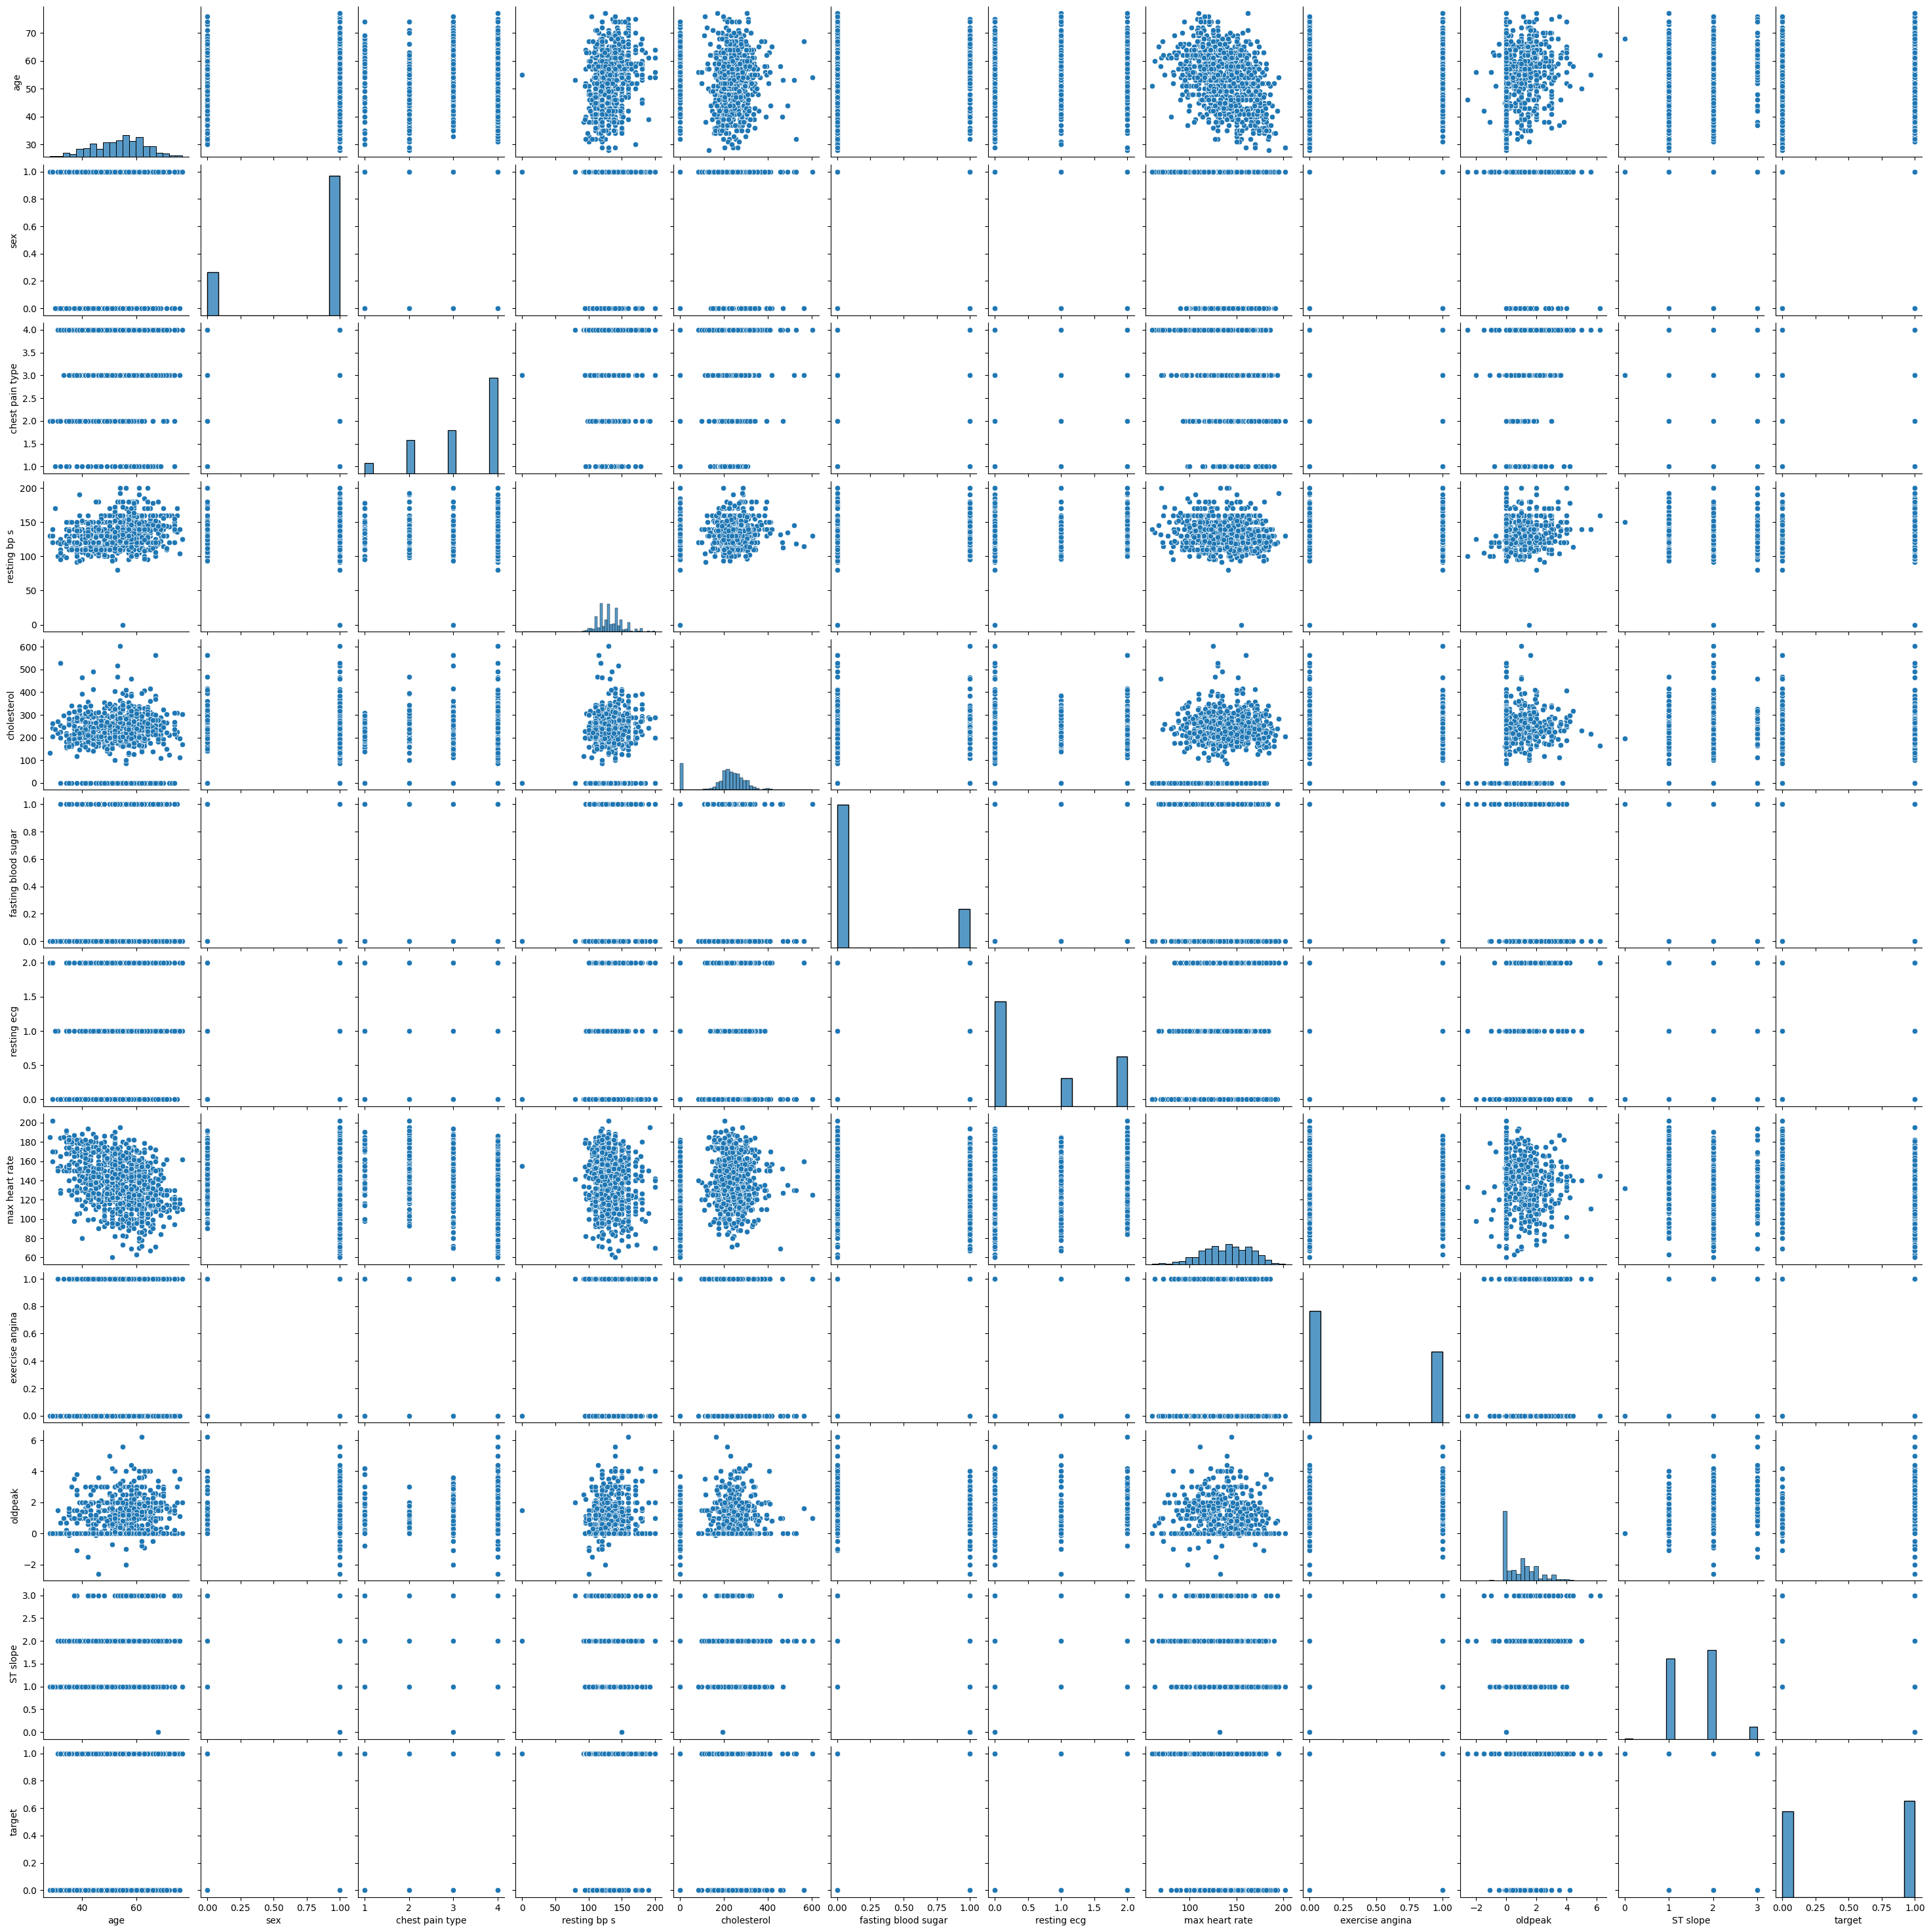

In [18]:
sns.pairplot(df)

<Axes: >

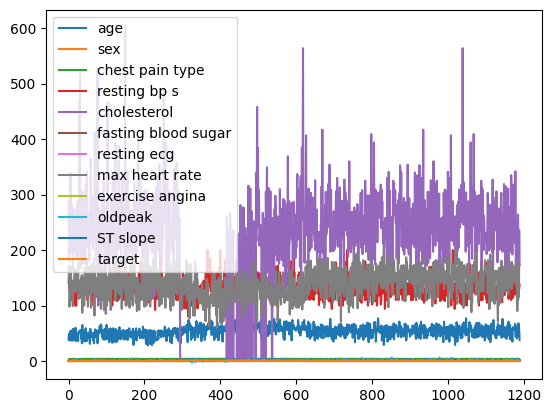

In [19]:
df.plot()

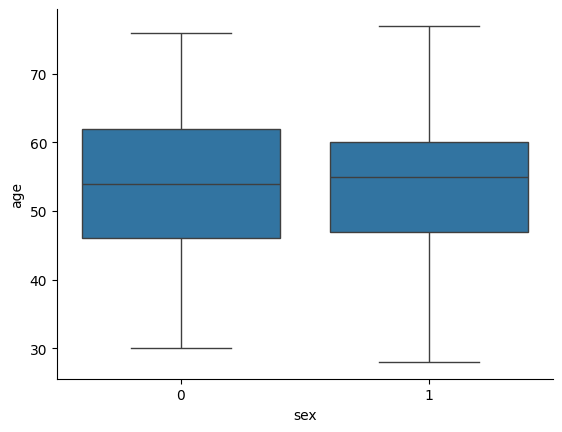

In [20]:
sns.boxplot(x=df['sex'],y= df['age'])
sns.despine()

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [22]:
X

array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.8 , random_state = 42)

In [24]:
name=[]
score=[]

## Using different Algorithms and choose best one that does not show Overfitting

In [25]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=50,max_depth=3,random_state=33) #criterion can be also : entropy
name.append("RandomForestClassifierModel")
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))
score.append(RandomForestClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

RandomForestClassifierModel Train Score is :  0.8571428571428571
RandomForestClassifierModel Test Score is :  0.8455882352941176
----------------------------------------------------


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
GBCModel = GradientBoostingClassifier(n_estimators=5,max_depth=3,random_state=33)
name.append("GradientBoostingClassifierModel")
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))
score.append(GBCModel.score(X_test, y_test))
print('----------------------------------------------------')

GBCModel Train Score is :  0.8781512605042017
GBCModel Test Score is :  0.8287815126050421
----------------------------------------------------


In [27]:
from sklearn.naive_bayes import GaussianNB
GaussianNBModel = GaussianNB()
name.append("GaussianNBModel")
GaussianNBModel.fit(X_train, y_train)
print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))
score.append(GaussianNBModel.score(X_test, y_test))
print('----------------------------------------------------')

GaussianNBModel Train Score is :  0.8403361344537815
GaussianNBModel Test Score is :  0.8256302521008403
----------------------------------------------------


In [28]:
from sklearn.linear_model import LogisticRegression
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
name.append("LogisticRegressionModel")
LogisticRegressionModel.fit(X_train, y_train)
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
score.append(LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.8067226890756303
LogisticRegressionModel Test Score is :  0.8319327731092437
LogisticRegressionModel Classes are :  [0 1]
----------------------------------------------------


In [29]:
from sklearn.linear_model import SGDClassifier
SGDClassifierModel = SGDClassifier(penalty='l2',learning_rate='optimal',random_state=33)
name.append("SGDClassifierModel")
SGDClassifierModel.fit(X_train, y_train)
#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
score.append(SGDClassifierModel.score(X_test, y_test))
print('SGDClassifierModel loss function is : ', SGDClassifierModel.loss)
print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)
print('----------------------------------------------------')

SGDClassifierModel Train Score is :  0.7478991596638656
SGDClassifierModel Test Score is :  0.7752100840336135
SGDClassifierModel loss function is :  hinge
SGDClassifierModel No. of iteratios is :  38
----------------------------------------------------


In [30]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
name.append("DecisionTreeClassifierModel")
DecisionTreeClassifierModel.fit(X_train, y_train)
#Calculating Details
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))
score.append(DecisionTreeClassifierModel.score(X_test, y_test))
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
print('----------------------------------------------------')

DecisionTreeClassifierModel Train Score is :  0.8487394957983193
DecisionTreeClassifierModel Test Score is :  0.8224789915966386
DecisionTreeClassifierModel Classes are :  [0 1]
----------------------------------------------------


In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
name.append("KNNClassifierModel")
KNNClassifierModel.fit(X_train, y_train)
#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
score.append(KNNClassifierModel.score(X_test, y_test))
print('----------------------------------------------------')

KNNClassifierModel Train Score is :  0.8697478991596639
KNNClassifierModel Test Score is :  0.8119747899159664
----------------------------------------------------


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
# ExtraTreesClassifier
etc = ExtraTreesClassifier()
name.append("ExtraTreesClassifier")
etc.fit(X_train, y_train)
print('ExtraTreesClassifier Train Score is:', etc.score(X_train, y_train))
print('ExtraTreesClassifier Test Score is:', etc.score(X_test, y_test))
score.append(etc.score(X_test, y_test))
print('----------------------------------------------------')

ExtraTreesClassifier Train Score is: 1.0
ExtraTreesClassifier Test Score is: 0.8466386554621849
----------------------------------------------------


In [33]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier
ada = AdaBoostClassifier()
name.append("AdaBoostClassifier")
ada.fit(X_train, y_train)
print('AdaBoostClassifier Train Score is:', ada.score(X_train, y_train))
print('AdaBoostClassifier Test Score is:', ada.score(X_test, y_test))
score.append(ada.score(X_test, y_test))
print('----------------------------------------------------')

AdaBoostClassifier Train Score is: 0.8613445378151261
AdaBoostClassifier Test Score is: 0.8382352941176471
----------------------------------------------------


In [34]:
from sklearn.ensemble import HistGradientBoostingClassifier

# HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
name.append("HistGradientBoostingClassifier")
hgb.fit(X_train, y_train)
print('HistGradientBoostingClassifier Train Score is:', hgb.score(X_train, y_train))
print('HistGradientBoostingClassifier Test Score is:', hgb.score(X_test, y_test))
score.append(hgb.score(X_test, y_test))
print('----------------------------------------------------')

HistGradientBoostingClassifier Train Score is: 1.0
HistGradientBoostingClassifier Test Score is: 0.8413865546218487
----------------------------------------------------


In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBClassifier
# XGBClassifier
xgb = XGBClassifier()
name.append("XGBClassifier")
xgb.fit(X_train, y_train)
print('XGBClassifier Train Score is:', xgb.score(X_train, y_train))
print('XGBClassifier Test Score is:', xgb.score(X_test, y_test))
score.append(xgb.score(X_test, y_test))
print('----------------------------------------------------')

XGBClassifier Train Score is: 1.0
XGBClassifier Test Score is: 0.8308823529411765
----------------------------------------------------


In [37]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
from catboost import CatBoostClassifier
# CatBoostClassifier
cat = CatBoostClassifier(verbose=0)
name.append("CatBoostClassifier")
cat.fit(X_train, y_train)
print('CatBoostClassifier Train Score is:', cat.score(X_train, y_train))
print('CatBoostClassifier Test Score is:', cat.score(X_test, y_test))
score.append(cat.score(X_test, y_test))
print('----------------------------------------------------')

CatBoostClassifier Train Score is: 0.9873949579831933
CatBoostClassifier Test Score is: 0.8634453781512605
----------------------------------------------------


In [39]:
pip install lightgbm

In [40]:
from lightgbm import LGBMClassifier
# LGBMClassifier
lgbm = LGBMClassifier(verbose=-1)
name.append("LGBMClassifier")
lgbm.fit(X_train, y_train)
print('LGBMClassifier Train Score is:', lgbm.score(X_train, y_train))
print('LGBMClassifier Test Score is:', lgbm.score(X_test, y_test))
score.append(lgbm.score(X_test, y_test))
print('----------------------------------------------------')


LGBMClassifier Train Score is: 1.0
LGBMClassifier Test Score is: 0.8413865546218487
----------------------------------------------------


In [41]:
from sklearn.neural_network import MLPClassifier
# MLPClassifier
mlp = MLPClassifier(random_state=0)
name.append("MLPClassifier")
mlp.fit(X_train, y_train)
print('MLPClassifier Train Score is:', mlp.score(X_train, y_train))
print('MLPClassifier Test Score is:', mlp.score(X_test, y_test))
score.append(mlp.score(X_test, y_test))
print('----------------------------------------------------')

MLPClassifier Train Score is: 0.9201680672268907
MLPClassifier Test Score is: 0.8403361344537815
----------------------------------------------------


In [42]:
from sklearn.svm import SVC
# SVC
SVCModel = SVC(kernel='linear', random_state=33)
name.append("SVCModel")
SVCModel.fit(X_train, y_train)
print('SVCModel Train Score is:', SVCModel.score(X_train, y_train))
print('SVCModel Test Score is:', SVCModel.score(X_test, y_test))
score.append(SVCModel.score(X_test, y_test))
print('----------------------------------------------------')

SVCModel Train Score is: 0.8277310924369747
SVCModel Test Score is: 0.8256302521008403
----------------------------------------------------


In [43]:
Model=pd.DataFrame (name,columns = ['Model'])   
Test_Accuracy=pd.DataFrame (score,columns = ['Test_Accuracy'])   

# Table contain Accuracy for all Algorithms used

In [44]:
pd.concat([Model,Test_Accuracy],axis=1)

,Model,Test_Accuracy
0,RandomForestClassifierModel,0.845588
1,GradientBoostingClassifierModel,0.828782
2,GaussianNBModel,0.825630
3,LogisticRegressionModel,0.831933
4,SGDClassifierModel,0.775210
5,DecisionTreeClassifierModel,0.822479
6,KNNClassifierModel,0.811975
7,ExtraTreesClassifier,0.846639
8,AdaBoostClassifier,0.838235
9,HistGradientBoostingClassifier,0.841387


### Define a dictionary with trained model instances

In [45]:

models = {
    'RandomForestClassifier': RandomForestClassifierModel,
    'GradientBoostingClassifier': GBCModel,
    'GaussianNB': GaussianNBModel,
    'LogisticRegression': LogisticRegressionModel,
    'SGDClassifier': SGDClassifierModel,
    'DecisionTreeClassifier': DecisionTreeClassifierModel,
    'KNNClassifier': KNNClassifierModel,
    'ExtraTreesClassifier': etc,
    'AdaBoostClassifier': ada,
    'HistGradientBoostingClassifier': hgb,
    'MLPClassifier': mlp,
    'SVCModel': SVCModel
}


In [46]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize metrics
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": []}

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))
    metrics["F1 Score"].append(f1_score(y_test, y_pred))

# Display results in a DataFrame
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


                             Model  Accuracy  Precision    Recall  F1 Score
0           RandomForestClassifier  0.845588   0.873469  0.834308  0.853440
1       GradientBoostingClassifier  0.828782   0.833969  0.851852  0.842816
2                       GaussianNB  0.825630   0.834297  0.844055  0.839147
3               LogisticRegression  0.831933   0.845401  0.842105  0.843750
4                    SGDClassifier  0.775210   0.775322  0.820663  0.797348
5           DecisionTreeClassifier  0.822479   0.816176  0.865497  0.840114
6                    KNNClassifier  0.811975   0.855319  0.783626  0.817904
7             ExtraTreesClassifier  0.846639   0.876797  0.832359  0.854000
8               AdaBoostClassifier  0.838235   0.847195  0.853801  0.850485
9   HistGradientBoostingClassifier  0.841387   0.867886  0.832359  0.849751
10                   MLPClassifier  0.840336   0.866126  0.832359  0.848907
11                        SVCModel  0.825630   0.849095  0.822612  0.835644


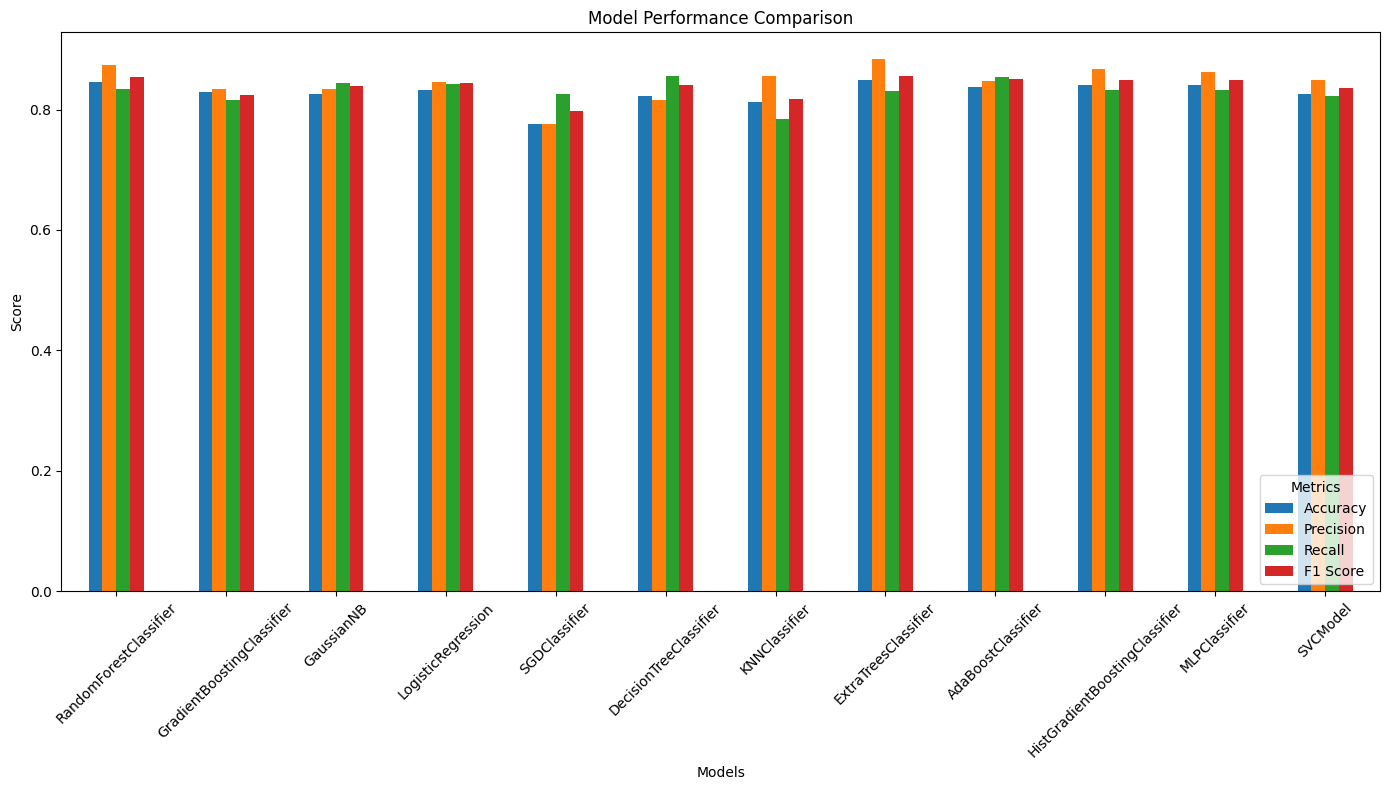

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your metrics table is already in a DataFrame named metrics_df
# If not, recreate it manually from your data:
metrics_df = pd.DataFrame({
    'Model': [
        'RandomForestClassifier', 'GradientBoostingClassifier', 'GaussianNB',
        'LogisticRegression', 'SGDClassifier', 'DecisionTreeClassifier',
        'KNNClassifier', 'ExtraTreesClassifier', 'AdaBoostClassifier',
        'HistGradientBoostingClassifier', 'MLPClassifier', 'SVCModel'
    ],
    'Accuracy': [0.8456, 0.8287, 0.8256, 0.8319, 0.7752, 0.8225,
                 0.8120, 0.8487, 0.8382, 0.8414, 0.8403, 0.8256],
    'Precision': [0.8735, 0.8339, 0.8342, 0.8454, 0.7752, 0.8161,
                  0.8553, 0.8840, 0.8472, 0.8679, 0.8616, 0.8491],
    'Recall': [0.8343, 0.8152, 0.8440, 0.8421, 0.8263, 0.8563,
               0.7836, 0.8310, 0.8538, 0.8323, 0.8323, 0.8226],
    'F1 Score': [0.8534, 0.8248, 0.8391, 0.8437, 0.7974, 0.8410,
                 0.8179, 0.8558, 0.8505, 0.8497, 0.8490, 0.8356]
})

# Set 'Model' as the index for plotting
metrics_df.set_index('Model', inplace=True)

# Plot the comparison graph
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(loc="lower right", title="Metrics")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
## Assuming RandomForestClassifierModel is already defined and fitted
## input_data = X[0]  # Take the first row as input_data
## input_data = np.array([[0.2, -0.1, 0.37, 0.4, 0.8, 0.47, -0.47, 0.82, 0.398, 0.41, 0.147]])

# # Make a prediction
## prediction = RandomForestClassifierModel.predict(input_data)

## print("Prediction:", prediction)

## I will be using the Random Forest Classifier

In [49]:
# Step 1: Generate Predictions using Random Forest
y_pred_rf = RandomForestClassifierModel.predict(X_test)

# Step 2: Align y_test and y_pred_rf in a DataFrame
rf_concatenate = pd.concat(
    [pd.DataFrame(y_test), pd.DataFrame(y_pred_rf, index=y_test.index)], 
    axis=1
)

# Step 3: Rename Columns for Clarity
rf_concatenate.columns = ['y_test', 'y_pred']

# Step 4: Add an 'error' Column to Mark Misclassifications
rf_concatenate['error'] = rf_concatenate['y_test'] != rf_concatenate['y_pred']

# Step 5: Display the First Few Rows
print(rf_concatenate.head())

# Step 6: Display Misclassification Statistics
print(rf_concatenate['error'].value_counts())


     y_test  y_pred  error
390       1       1  False
247       1       1  False
260       0       0  False
155       1       1  False
984       1       1  False
error
False    805
True     147
Name: count, dtype: int64


In [50]:
#Analyze misclassified samples
misclassified_samples = rf_concatenate[rf_concatenate['error'] == True]
print(misclassified_samples.head())


     y_test  y_pred  error
752       0       1   True
759       1       0   True
761       1       0   True
277       1       0   True
422       0       1   True


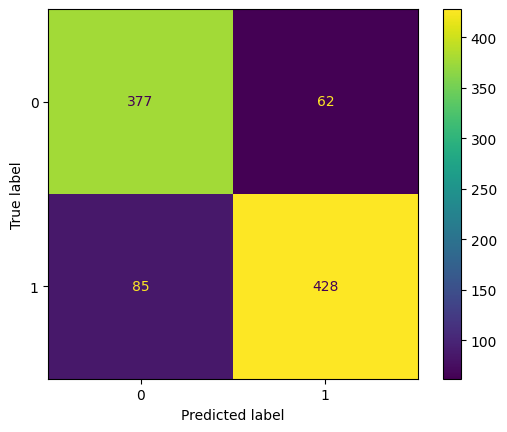

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()


### Classification report

In [52]:
from sklearn.metrics import classification_report

# Step 1: Generate Predictions using Random Forest
y_pred_rf = RandomForestClassifierModel.predict(X_test)

# Step 2: Generate the Classification Report
classificationReport = classification_report(y_test, y_pred_rf)

# Step 3: Print the Report
print('Classification Report for Random Forest Classifier:\n', classificationReport)


Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       439
           1       0.87      0.83      0.85       513

    accuracy                           0.85       952
   macro avg       0.84      0.85      0.85       952
weighted avg       0.85      0.85      0.85       952



In [53]:
from sklearn.metrics import zero_one_loss

# Step 2: Calculate Normalized Zero-One Loss (Percentage of Incorrect Predictions)
z_o_l_normalized = zero_one_loss(y_test, y_pred_rf, normalize=True)
print('Zero-One Loss (Percentage of False Predictions):', z_o_l_normalized)

# Step 3: Calculate Non-Normalized Zero-One Loss (Number of Incorrect Predictions)
z_o_l_count = zero_one_loss(y_test, y_pred_rf, normalize=False)
print('Zero-One Loss (Number of False Predictions):', z_o_l_count)


Zero-One Loss (Percentage of False Predictions): 0.15441176470588236
Zero-One Loss (Number of False Predictions): 147.0


In [65]:
import joblib

# Save the trained Random Forest model
joblib.dump(RandomForestClassifierModel, 'random_forest_model.pkl')


['random_forest_model.pkl']

<iframe src="https://www.kaggle.com/embed/michaelxyjonathan/heart-disease-eda-and-classification-acc-94-5?cellIds=2&kernelSessionId=181060543" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Heart Disease | EDA and Classification | ACC:94.5%"></iframe>